In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm



C:\Users\Kadir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Index'>

<Figure size 3600x720 with 0 Axes>

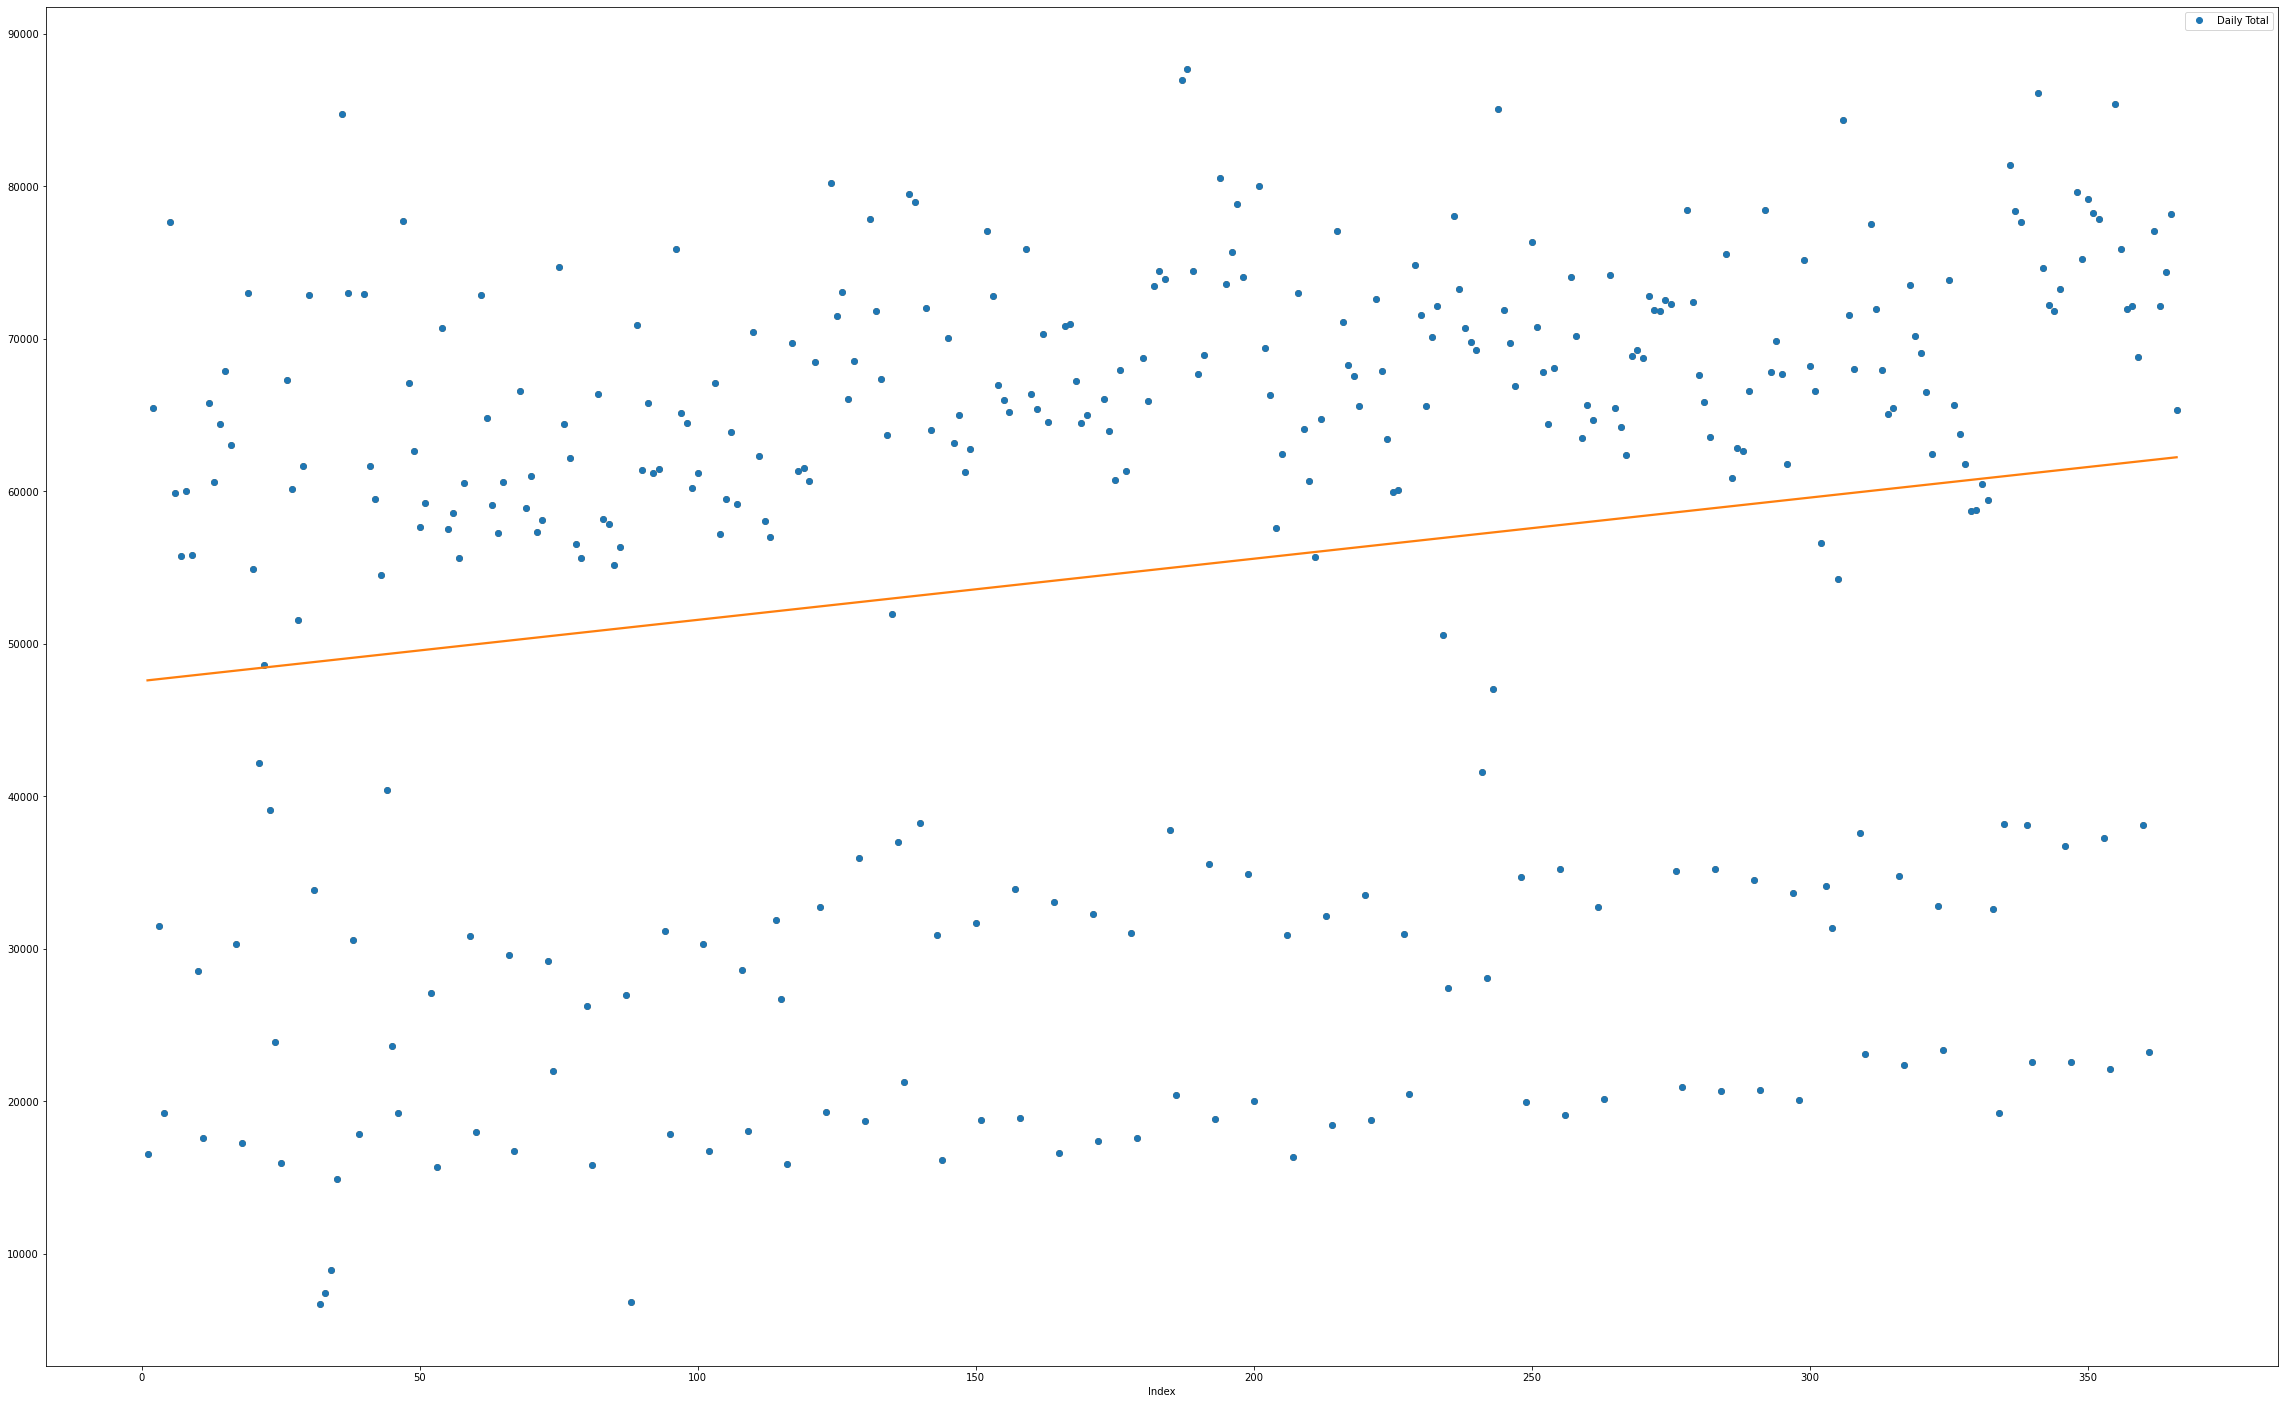

In [2]:
df = pd.read_excel('HW2_data.xlsx')

plt.figure(figsize=(50,10))

df.plot(x='Index', y='Daily Total', style='o', figsize=(40,25))

x = df['Index']
x = np.array(x)
y = df['Daily Total']
y = np.array(y)

sns.regplot(x, y, ci=None)


C:\Users\Kadir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Index'>

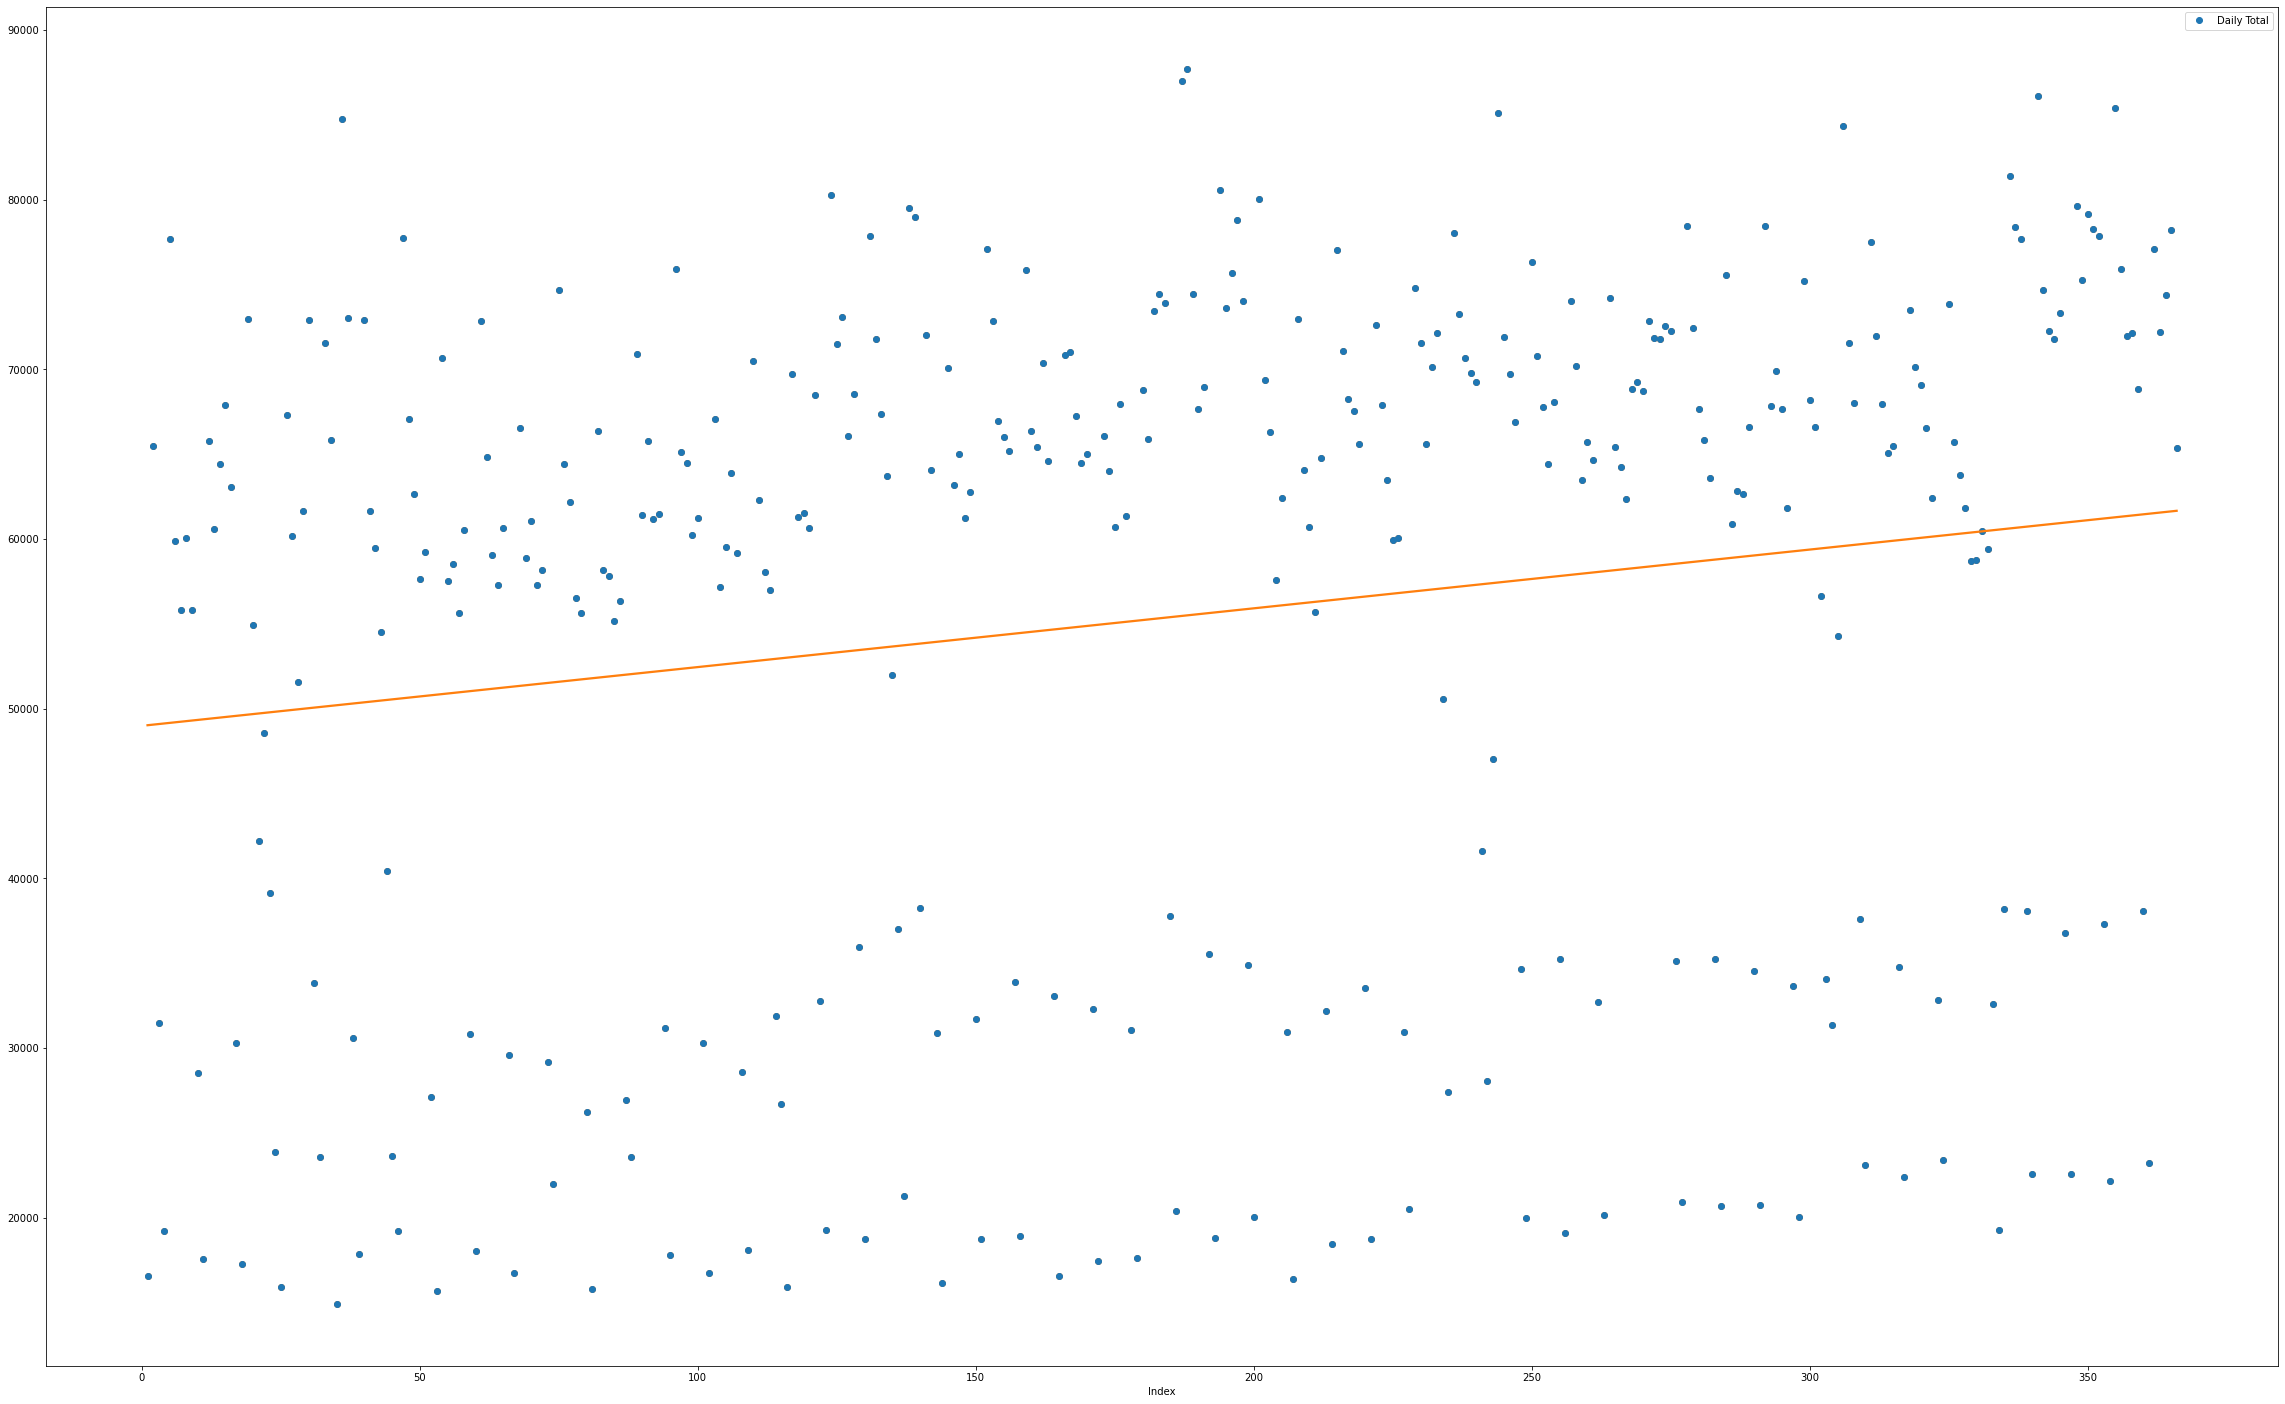

In [3]:
#I found mean of outliers in 12 month seasonality
Mean88 = df.loc[df['Index'] % 7 == 4, 'Daily Total'].mean()
Mean32 = df.loc[df['Index'] % 7 == 4, 'Daily Total'].mean()
Mean33 = df.loc[df['Index'] % 7 == 5, 'Daily Total'].mean()
Mean34 = df.loc[df['Index'] % 7 == 6, 'Daily Total'].mean()

#Enter means for outlier entries
df.at[87, 'Daily Total'] = Mean88
df.at[31, 'Daily Total'] = Mean32
df.at[32, 'Daily Total'] = Mean33
df.at[33, 'Daily Total'] = Mean34


#Plotting updated data
df.plot(x='Index', y='Daily Total', style='o', figsize=(40,25))
x = df['Index']
x = np.array(x)
y = df['Daily Total']
y = np.array(y)

sns.regplot(x, y, ci=None)



In [4]:
#Splitting data to train and test

Index = df['Index'] 
df['İndex'] = pd.Series(Index)


X_Train = df[0:275]
X_Test = df[275:367]

X_Train = X_Train.set_index('Index')
X_Test = X_Test.set_index('Index')

X_Test = X_Test.reset_index()
X_Test

,Index,Date,Daily Total,İndex
0,276,2004-10-02,35132,276
1,277,2004-10-03,20957,277
2,278,2004-10-04,78457,278
3,279,2004-10-05,72455,279
4,280,2004-10-06,67667,280
...,...,...,...,...
86,362,2004-12-27,77083,362
87,363,2004-12-28,72193,363
88,364,2004-12-29,74399,364
89,365,2004-12-30,78221,365


In [5]:
#Forecasting for Dt-7 test and train data

Dt_7 = np.pad(X_Train['Daily Total'],(7,0),mode='constant')
X_Train = X_Train.reindex(list(range(1, 282)))
X_Train['Dt−7'] = pd.Series(Dt_7)


Dt_7_te = np.pad(X_Test['Daily Total'],(7,0),mode='constant')
Dt_7_te = Dt_7_te.astype(float)
X_Test = X_Test.reindex(list(range(0, 98)))
X_Test['Dt−7'] = pd.Series(Dt_7_te)


#Make Nan for some forecast entries
X_Train.loc[X_Train['Dt−7'] == 0,'Dt−7'] = np.nan
X_Test.loc[X_Test['Dt−7'] == 0,'Dt−7'] = np.nan

#calculation of error
X_Train['Error Dt−7'] = X_Train['Daily Total'] - X_Train['Dt−7']
X_Test['Error Dt−7'] = X_Test['Daily Total'] - X_Test['Dt−7']


#Calculation of Mean absolute Percentage error for test and train
MAPE_Dt7 = np.mean(np.abs(X_Train['Error Dt−7'] / X_Train['Daily Total']))*100
MAPE_Dt7_test = np.mean(np.abs(X_Test['Error Dt−7'] / X_Test['Daily Total']))*100
print("Mean absolute Percentage error for Dt7 for train set: ", MAPE_Dt7,"for test set:",MAPE_Dt7_test)

#Calculation of RMSE for test and train
RMSE_Dt7 = np.sqrt((X_Train['Error Dt−7'] ** 2).mean())
RMSE_Dt7_test = np.sqrt((X_Test['Error Dt−7'] ** 2).mean())
print("RMSE for Dt7 for training set: ", RMSE_Dt7,"for test set: " ,RMSE_Dt7_test)



Mean absolute Percentage error for Dt7 for train set:  60.435610855588095 for test set: 18.407558070976215
RMSE for Dt7 for training set:  25600.07791250632 for test set:  15420.434377953234


RMSE:  20982.629494363868
Mean absolute Percentage error for S.Smoothing for train set:  51.0427874224709


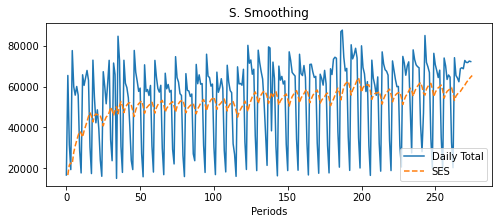

In [6]:
#Seasonal exponential smoothing
d = X_Train['Daily Total']

alpha=0.1
extra_periods=7
d = np.array(d)  # Transform the input into a numpy array  
cols = len(d)  # Historical period length  
d = np.append(d,[np.nan]*extra_periods)  # Append np.nan into the demand array to cover future periods  
f = np.full(cols+extra_periods,np.nan)  # Forecast array  
f[1] = d[0]  # initialization of first forecast     
# Create all the t+1 forecasts until end of historical period  
for t in range(2,cols+1):  
    f[t] = alpha*d[t-1]+(1-alpha)*f[t-1]  
f[cols+1:] = f[t]  # Forecast for all extra periods  
cf = pd.DataFrame.from_dict({"Daily Total":d,"SES":f,"Error for SES":d-f})  

cf.index.name = "Periods"



cf[["Daily Total","SES"]].plot(figsize=(8,3),title="S. Smoothing",style=["-","--"])  
cf.head(30)

#Calculation of RMSE and MAPE
RMSE_SES = np.sqrt((cf['Error for SES'] ** 2).mean())
print("RMSE: ", RMSE_SES)

MAPE_SS = np.mean(np.abs(cf['Error for SES'] / cf['Daily Total']))*100
print("Mean absolute Percentage error for S.Smoothing for train set: ", MAPE_SS)

RMSE:  21399.27965772716
Mean absolute Percentage error for S.Smoothing for test set:  44.74971952009299


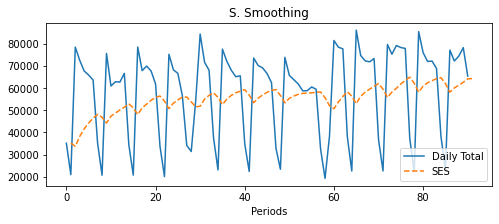

In [7]:
#Simple Exponential Smoothing
d = X_Test['Daily Total']

alpha=0.1
extra_periods=7
d = np.array(d)  # Transform the input into a numpy array  
cols = len(d)  # Historical period length  
d = np.append(d,[np.nan]*extra_periods)  # Append np.nan into the demand array to cover future periods  
f = np.full(cols+extra_periods,np.nan)  # Forecast array  
f[1] = d[0]  # initialization of first forecast     
# Create all the t+1 forecasts until end of historical period  
for t in range(2,cols+1):  
    f[t] = alpha*d[t-1]+(1-alpha)*f[t-1]  
f[cols+1:] = f[t]  # Forecast for all extra periods  
cftest = pd.DataFrame.from_dict({"Daily Total":d,"SES":f,"Error for SES":d-f})  

cftest.index.name = "Periods"



cftest[["Daily Total","SES"]].plot(figsize=(8,3),title="S. Smoothing",style=["-","--"])  
cftest.head(30)

#Calculation of RMSE and MAPE
RMSE_SES = np.sqrt((cftest['Error for SES'] ** 2).mean())
print("RMSE: ", RMSE_SES)

MAPE_SS_Test = np.mean(np.abs(cftest['Error for SES'] / cftest['Daily Total']))*100
print("Mean absolute Percentage error for S.Smoothing for test set: ", MAPE_SS_Test)

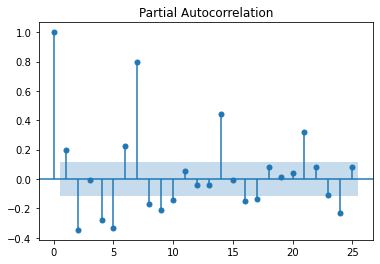

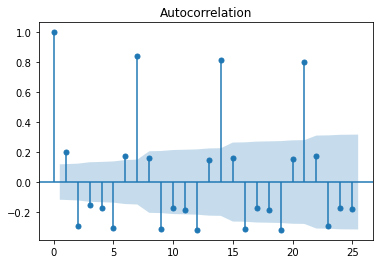

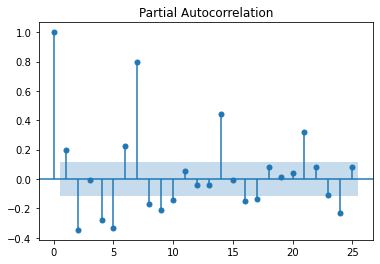

In [8]:
#Manipulatin for data to correspond acf and pacf.

del X_Train['Date']
del X_Train['İndex']
del X_Train['Dt−7']
del X_Train['Error Dt−7']
X_Train = X_Train.dropna()

del X_Test['Date']
del X_Test['Index']
del X_Test['İndex']
del X_Test['Dt−7']
del X_Test['Error Dt−7']
X_Test = X_Test.dropna()

# plot the auto correlation
plot_acf(X_Train)
plot_pacf(X_Train)



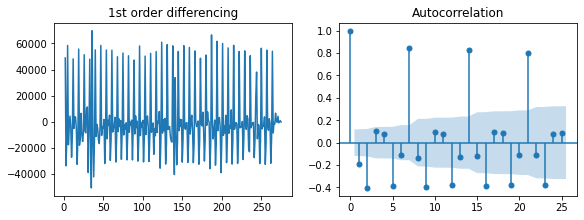

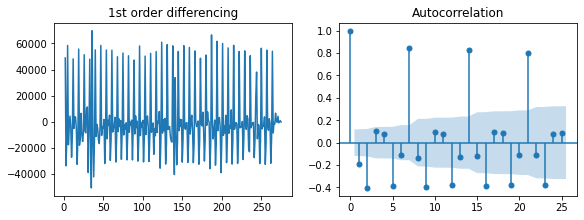

In [9]:
#Differencing and Autocorrelation

f = plt.figure(figsize=(40,7))
ax1 = f.add_subplot(285)
ax1.set_title('1st order differencing')
ax1.plot(X_Train.diff())



ax2= f.add_subplot(286)
plot_acf(X_Train.diff().dropna(), ax = ax2)


In [10]:
mod_arma = sm.tsa.statespace.SARIMAX(X_Train, trend='c', order=(0,0,1), seasonal_order=(0, 0, 0, 0))

results_arma = mod_arma.fit()
results_arma.summary()

C:\Users\Kadir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Kadir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Daily Total   No. Observations:                  275
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -3101.418
Date:                Fri, 08 Apr 2022   AIC                           6208.837
Time:                        20:38:29   BIC                           6219.687
Sample:                             0   HQIC                          6213.191
                                - 275                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.316e+04   1791.507     29.673      0.000    4.96e+04    5.67e+04
ma.L1          0.4354      0.069      6.272      0.000       0.299       0.571
sigma2       3.37e+08      0.004   9.11e+10      0.000    3.37e+08    3.37e+08
===================================================================================
Ljung-Box (L1) (Q):                   2.76   Jarque-Bera (JB):                 8.32
Prob(Q):                              0.10   Prob(JB):                         0.02
Heteroskedasticity (H):               0.94   Skew:                             0.01
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.15e+27. Standard errors may be unstable.
"""

In [11]:
#Data manipulation
X_Train = X_Train.reset_index()
del X_Train['Index']

train = X_Train['Daily Total']
test = X_Test['Daily Total']


Train RMSE: 19309.023
Train MAPE:  44.52298023786099


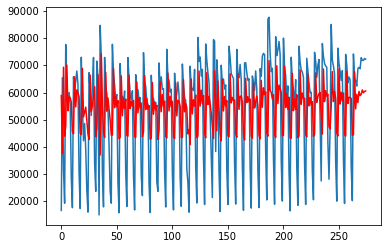

In [12]:
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error


history = [x for x in test]
predictions = list()
# walk-forward validation
for c in range(len(train)):
    model = ARIMA(history, order=(0,0,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = train[c]
    history.append(obs)
# evaluate forecasts
rmse = sqrt(mean_squared_error(train, predictions))
print('Train RMSE: %.3f' % rmse)

mape = np.mean(np.abs((train - predictions) / train)) * 100
print("Train MAPE: ", mape)
# plot forecasts against actual outcomes
pyplot.plot(train)
pyplot.plot(predictions, color='red')
pyplot.show()

Test RMSE: 18886.997
Test MAPE:  36.36235954752235


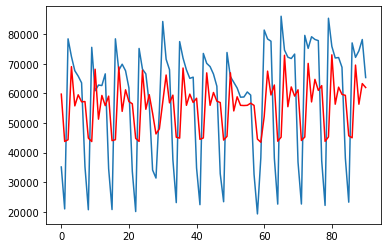

In [13]:
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error


history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(0,0,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


mape = np.mean(np.abs((test - predictions) / test)) * 100
print("Test MAPE: ", mape)


# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()